In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import random as rnd
rnd.seed()
import copy

In [2]:
def draw_G(G):
    # input : a networkx graph G
    # output: a spring-plot of the network

    print(f'graph with n={G.order()} nodes and m={G.size()} edges:')
    nx.draw_networkx(G,with_labels=True,node_size=600,width=2) # draw it pretty
    limits=plt.axis('off')                                     # turn off axes
    plt.show()
    return

In [3]:
def compute_MGD(G):
    # from PS3
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)

    dij = dict(nx.all_pairs_shortest_path_length(G)) # APSP on G, store as a dictionary (tricky :)

    ells = []                            # list of non-zero and non-infinite lengths
    for node in dij:                     # loop over all the nodes
        temp = list(dij[node].values())  #   get the list of distances
        for length in temp:              #     for each of those distances
            if length>0:                 #     ignore if =0
                ells.append(length)      #     otherwise, add it to ells
                
    ellmean = np.mean(ells)              # MGD = numpy mean of ells list
    return ellmean

## Interesting parameters
### 1. Vaccines dosages related to the success rate of vaccination, 1-dose has a success rate of ~0.8; 2-dose has a higher success rate of ~0.95.
### 2. Super group, flocking (a large amount of increased susceptible nodes introduced into the network).
### 3. Social tendency (function with time and with connected nodes).
### 4. In-person or Remote (low transmission rate + relatively high susceptible) || (relatively high transmission rate + low infected and susceptible)
### 5. Prediction of ongoing campus network structure.

## Network Structure

#### We will have 3 partitions of nodes, early age, middle age and older age and the difference amongst these three partitions is each type of nodes has more edges connected between its own group and there will only be one to two edges to nodes in other partitions. Setting of the extra dictionary labels, three

In [4]:
def vaccine_assign(vz,n,s):
    t = 0
    while any(i <= 1 for i in vz.values()):
        vac = int(n/s * random.uniform(1, 2))
        if t >= 20:
            vac = int(n/s * random.uniform(2, 4))
        v_key = [k for k,v in vz.items() if v != 2]
        j = random.choice(v_key)
        vz[j] += 1
        
        

## A Lockdown Family-based model

number of nodes, n  = 400
number of edges, m  = 1187
mean degree   , <k> =  5.94
clustering coefficient, C     =  0.59
mean geodesic distance, <ell> =  4.79
time step 1


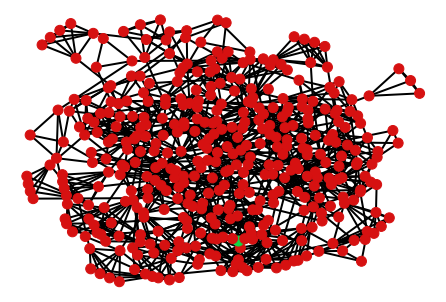

time step 2


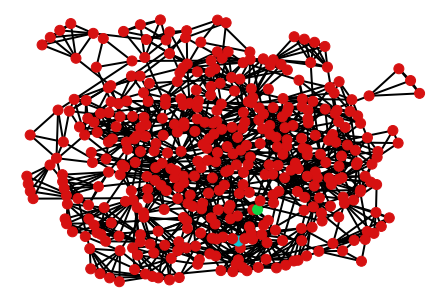

time step 3


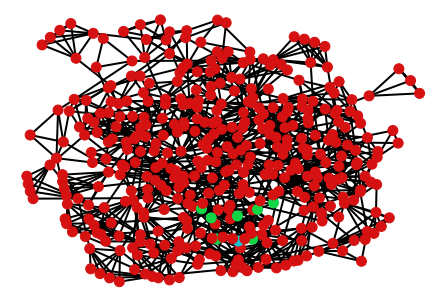

time step 4


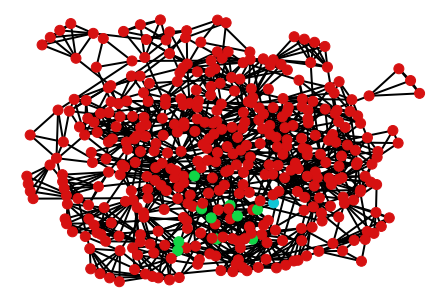

time step 5


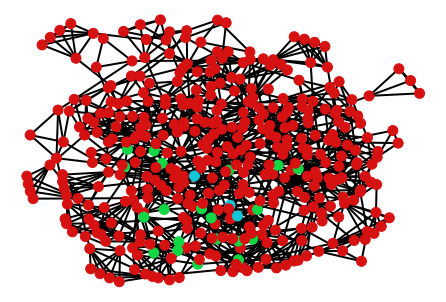

time step 6


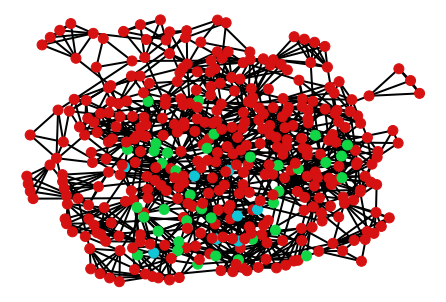

time step 7


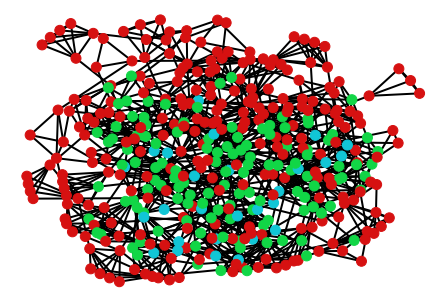

time step 8


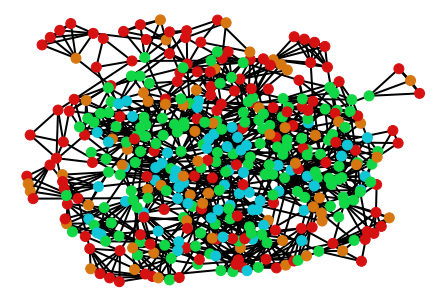

time step 9


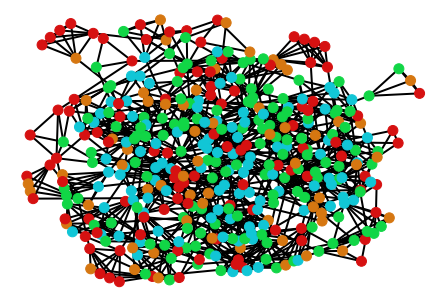

time step 10


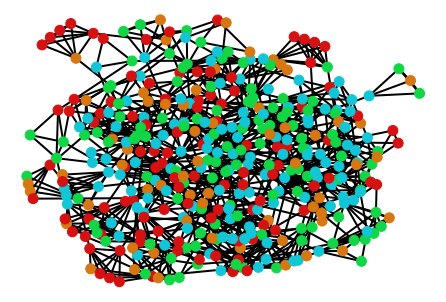

time step 11


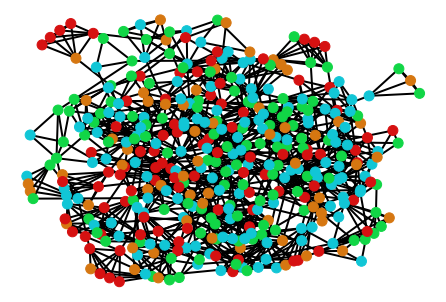

time step 12


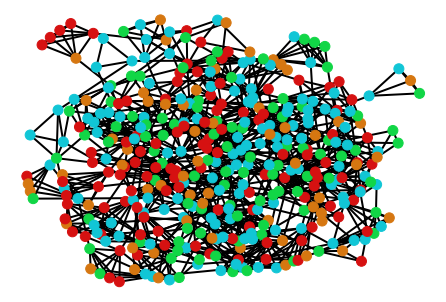

time step 13


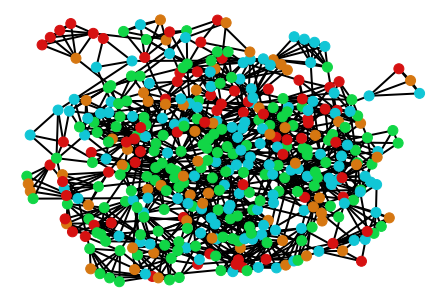

time step 14


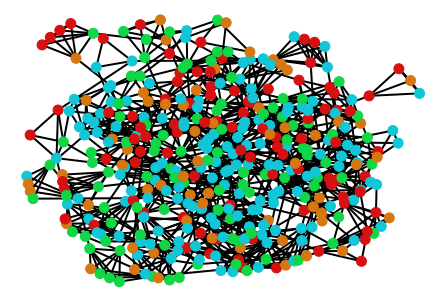

time step 15


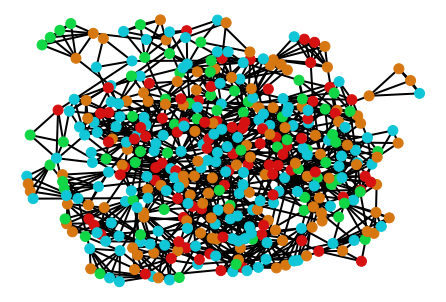

time step 16


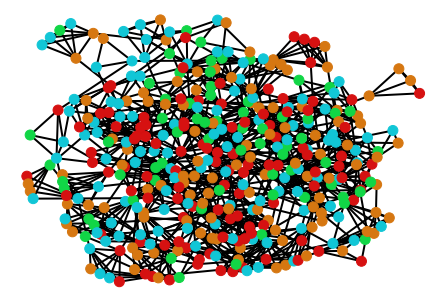

time step 17


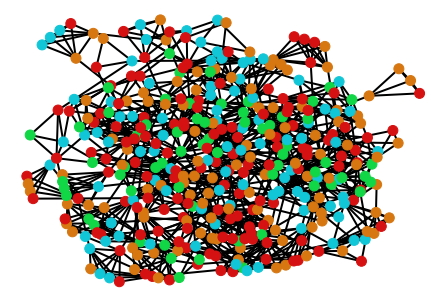

time step 18


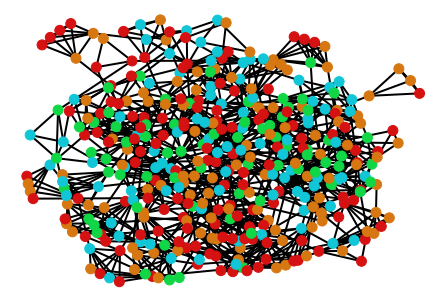

time step 19


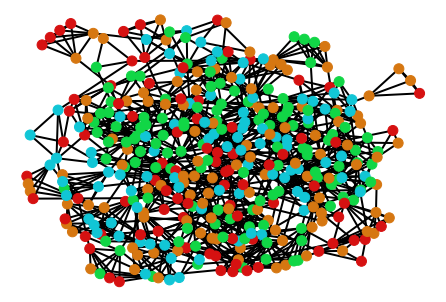

time step 20


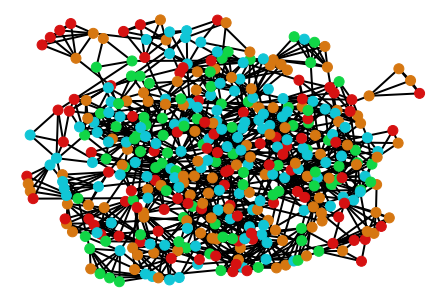

time step 21


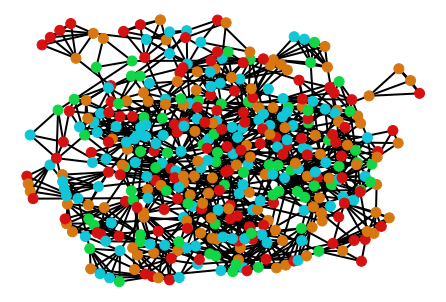

time step 22


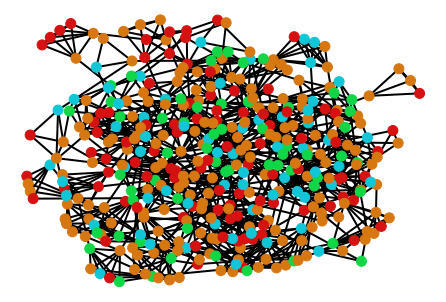

time step 23


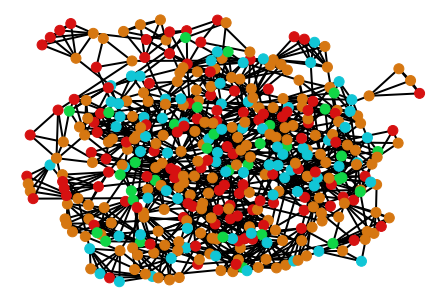

time step 24


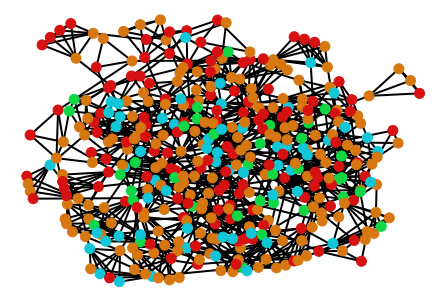

time step 25


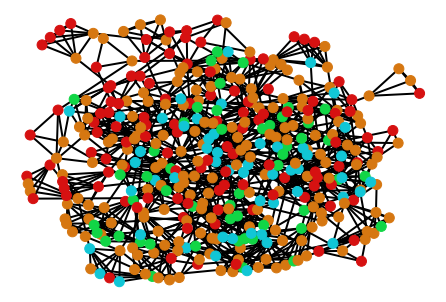

time step 26


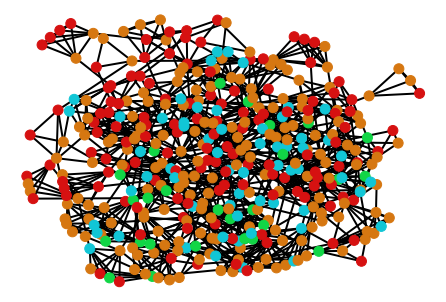

time step 27


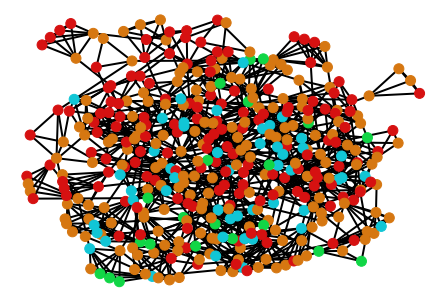

time step 28


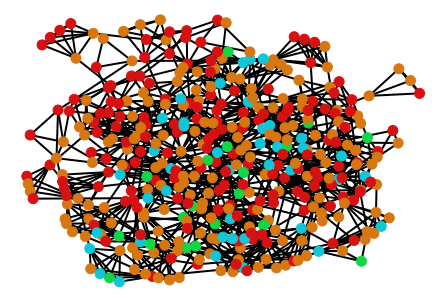

time step 29


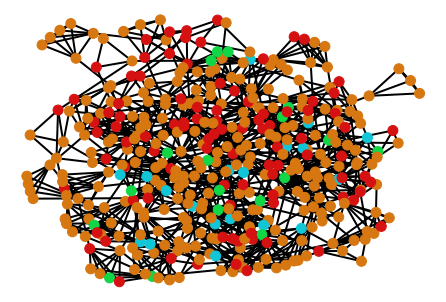

time step 30


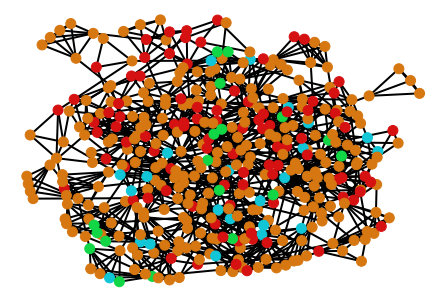

number of steps in epidemic: 29
final number of S: 243
final number of R: 86
final number of V: 521


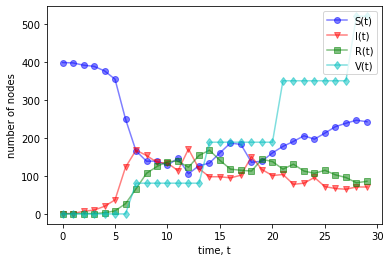

In [5]:
import SIR_template

#a lockdown family-based model
n     = 400
s     = 6 #mean cluster size, 2 kids + 2 parents + 2 grandparents
num_clust = n/s
v     = 7 #variance s/v
p_in  = 1 #intra edges probability within clusters, within the family, all members are connected
p_out = 0.001 * 0.05 * n/s #inter edges probability across clusters 
G = nx.gaussian_random_partition_graph(n, s, v, p_in, p_out)

n = G.number_of_nodes() #num of nodes
m = G.number_of_edges() #num of edges
kmean = 1/n * 2 * m
C = nx.transitivity(G)
ellmean = compute_MGD(G)


##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree   , <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
#draw_G(G)


o  = G.order()
zt = dict.fromkeys(range(o), 'S') # all nodes S, initially

import random
group = n/s
#Each family has 1 to 2 members going to the flocking event
flocking = int(group * random.uniform(1, 2))
#Within the time-scale, flocking will change with a random number


SIR = SIR_template.SIR()
SIR.SIRS_flocking_Simulation(G = G,beta = 0.5,gamma = 0.5, sigma = 0.4, flocking = flocking, group = num_clust)

In [6]:
import SIR_template
#
l,k = 12,5 # l cliques each containing k nodes


#G_pre  = 
G_cur  = nx.connected_caveman_graph(l,k)
o_cur      = G_cur.order()
zt_cur     = dict.fromkeys(range(o_cur), 'S') # all nodes S, initially
#draw_G(G)
drawGz(G_cur,zt_cur)
#G_post = 
#SIR = SIR_template.SIR()
#SIR.SIR_Simulation(G = G,beta = 0.3,gamma = 0.3)

NameError: name 'drawGz' is not defined